In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '6,7'
os.environ['JAX_PLATFORMS'] = 'cpu'
import pickle
import matplotlib.pyplot as plt

import jax.numpy as jnp
import jax


In [2]:
%cd ..

/home/hcduc/projects/bpignn


# Plain model

In [3]:
with open('results/pendulum-n3/no_noise/no_noiseall_traj.pkl', 'rb') as f:
    all_traj = pickle.load(f)

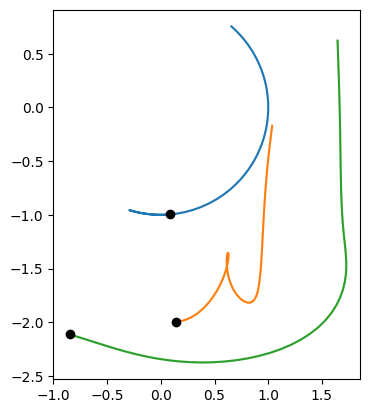

In [4]:
idx = 4

trajectories = all_traj[idx]

r = trajectories['actual_pos']
for i in range(r.shape[1]):
    plt.plot(r[:,i,0], r[:,i,1], '-', color=f'C{i}', alpha=0.2)
# plt.plot(r[-1,:,0], r[-1,:,1], 'o', color='black', alpha=0.1)

r = trajectories['pred_pos'][100][:100]
for i in range(r.shape[1]):
    plt.plot(r[:,i,0], r[:,i,1], '-', color=f'C{i}', alpha=1.)
plt.plot(r[-1,:,0], r[-1,:,1], 'o', color='black', alpha=1.)

plt.gca().set_aspect('equal', adjustable='box')
plt.show()

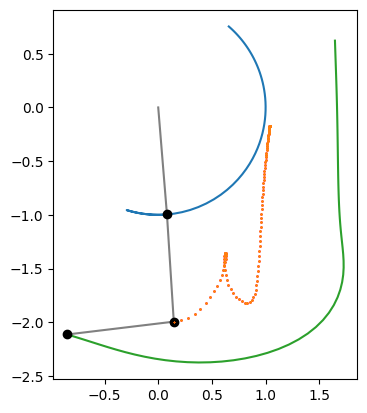

In [5]:
i_err = 1
num_samples = 100

# r = trajectories['actual_pos']
# for i in range(r.shape[1]):
#     plt.plot(r[:,i,0], r[:,i,1], '-', color=f'C{i}', alpha=0.2)
    
# plt.plot(r[-1,:,0], r[-1,:,1], 'o', color='black', alpha=0.1)

r = trajectories['pred_pos_avg'][:100, ...]
for i in range(r.shape[1]):
    if i != i_err:
        plt.plot(r[:,i,0], r[:,i,1], '-', color=f'C{i}')

plt.plot([0] + list(r[-1,:,0]), [0] + list(r[-1,:,1]), '-', color='gray', alpha=1.)
plt.plot(r[-1,:,0], r[-1,:,1], 'o', color='black')

r = trajectories['pred_pos'][:, :100, ...]
for t in range(r.shape[1]):
    plt.plot(r[:,t,i_err,0], r[:,t,i_err,1], '.', color=f'C{i_err}', 
             markerfacecolor=None, alpha=5. / num_samples, ms=1)


plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [6]:
pred_pos_stds = []
for traj in all_traj:
    pred_pos = traj['pred_pos']
    pred_pos_std = jnp.std(pred_pos, axis=0)
    pred_pos_stds.append(pred_pos_std)
pred_pos_stds = jnp.stack(pred_pos_stds, axis=0)

In [8]:
pred_pos_stds.shape

(10, 300, 3, 2)

In [10]:
pred_pos_all = []
actual_pos_all = []
for traj in all_traj:
    pred_pos = traj['pred_pos_avg'][:100]
    actual_pos = traj['actual_pos']
    pred_pos_all.append(pred_pos)
    actual_pos_all.append(actual_pos)
    
pred_pos_all = jnp.stack(pred_pos_all, axis=0)
actual_pos_all = jnp.stack(actual_pos_all, axis=0)

(array([1.955e+03, 6.860e+02, 2.200e+02, 1.880e+02, 1.350e+02, 1.310e+02,
        1.320e+02, 1.220e+02, 1.020e+02, 9.100e+01, 1.230e+02, 9.500e+01,
        9.500e+01, 8.100e+01, 8.200e+01, 9.900e+01, 7.000e+01, 7.100e+01,
        7.500e+01, 6.100e+01, 6.500e+01, 6.200e+01, 5.700e+01, 8.000e+01,
        6.100e+01, 6.000e+01, 4.000e+01, 4.200e+01, 3.800e+01, 3.600e+01,
        3.800e+01, 2.700e+01, 3.800e+01, 1.900e+01, 2.800e+01, 2.400e+01,
        1.700e+01, 2.500e+01, 1.800e+01, 1.800e+01, 1.600e+01, 2.400e+01,
        2.300e+01, 1.900e+01, 2.200e+01, 2.400e+01, 2.600e+01, 2.500e+01,
        1.900e+01, 1.700e+01, 2.400e+01, 1.400e+01, 2.200e+01, 1.700e+01,
        2.500e+01, 2.300e+01, 1.900e+01, 1.100e+01, 1.600e+01, 1.800e+01,
        1.800e+01, 1.400e+01, 1.100e+01, 1.700e+01, 1.100e+01, 6.000e+00,
        2.000e+00, 9.000e+00, 6.000e+00, 5.000e+00, 5.000e+00, 8.000e+00,
        4.000e+00, 7.000e+00, 6.000e+00, 2.000e+00, 6.000e+00, 5.000e+00,
        6.000e+00, 5.000e+00, 1.000e+0

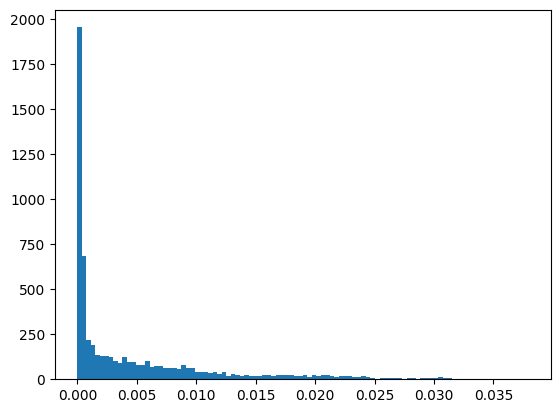

In [17]:
diff = jnp.abs(pred_pos_all - actual_pos_all).flatten()
plt.hist(diff, bins=100)

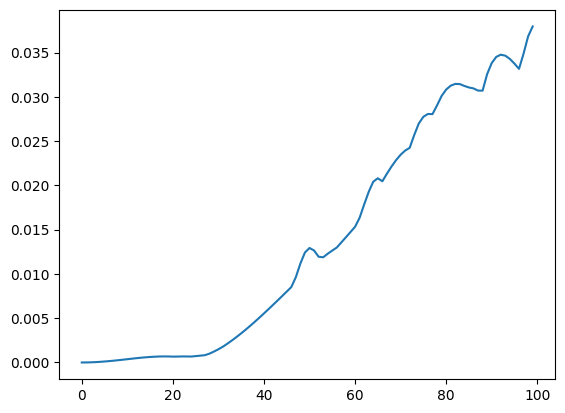

In [22]:
diff = jnp.abs(pred_pos_all - actual_pos_all)
diff = jnp.transpose(diff, (1, 0, 2, 3))
diff = diff.reshape((diff.shape[0], -1))
diff = diff.max(axis=1)
plt.plot(diff)

In [24]:
pred = trajectories['pred_pos_avg'][:100, ...]
actual = trajectories['actual_pos']
jnp.max(jnp.abs(pred - actual))

Array(0.03145498, dtype=float32)

In [7]:
trajectories['pred_pos'].shape

(100, 300, 3, 2)

# Dropout model

In [14]:
with open('results/pendulum-n3/dropout_0.5/all_traj.pkl', 'rb') as f:
    all_traj = pickle.load(f)
all_traj = jax.device_put(all_traj, jax.devices('cpu')[0])

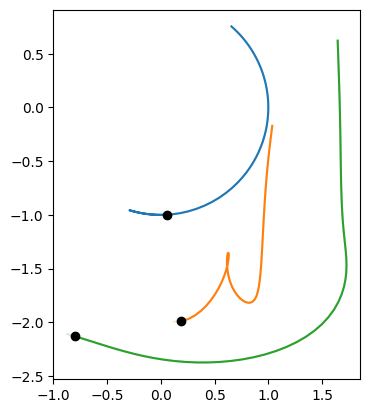

In [15]:
idx = 4

trajectories = all_traj[idx]

r = trajectories['actual_pos']
for i in range(r.shape[1]):
    plt.plot(r[:,i,0], r[:,i,1], '-', color=f'C{i}', alpha=0.2)
# plt.plot(r[-1,:,0], r[-1,:,1], 'o', color='black', alpha=0.1)

r = trajectories['pred_pos'][100][:100]
for i in range(r.shape[1]):
    plt.plot(r[:,i,0], r[:,i,1], '-', color=f'C{i}', alpha=1.)
plt.plot(r[-1,:,0], r[-1,:,1], 'o', color='black', alpha=1.)

plt.gca().set_aspect('equal', adjustable='box')
plt.show()

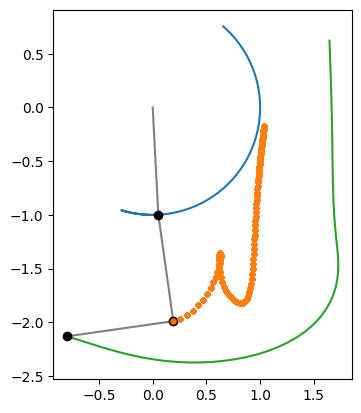

In [16]:
i_err = 1

r = trajectories['pred_pos_avg'][:100]
for i in range(r.shape[1]):
    if i != i_err:
        plt.plot(r[:,i,0], r[:,i,1], '-', color=f'C{i}')

plt.plot([0] + list(r[-1,:,0]), [0] + list(r[-1,:,1]), '-', color='gray', alpha=1.)
plt.plot(r[-1,:,0], r[-1,:,1], 'o', color='black')

r = trajectories['pred_pos'][:, :100]
for t in range(r.shape[1]):
    plt.plot(r[:,t,i_err,0], r[:,t,i_err,1], '.', color=f'C{i_err}', 
             markerfacecolor=None, alpha=0.1)


plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [17]:
pred_pos_stds = []
for traj in all_traj:
    pred_pos = traj['pred_pos']
    pred_pos_std = jnp.std(pred_pos, axis=0)
    pred_pos_stds.append(pred_pos_std)
pred_pos_stds = jnp.stack(pred_pos_stds, axis=0)

In [19]:
pred_pos_stds.shape

(10, 300, 3, 2)